# Ridge Regression Models

In [384]:
%matplotlib inline
import numpy as np
from cross_validation import cross_validation
from polynomial import build_poly
import matplotlib.pyplot as plt

In [385]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train_1-1.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 14)
(250000,)


In [386]:
X_pri_0 = X_train[(X_train[:, -2] == 0), :]
X_pri_1 = X_train[(X_train[:, -2] == 1), :]
X_pri_23 = X_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3), :]

y_pri_0 = y_train[(X_train[:, -2] == 0)]
y_pri_1 = y_train[(X_train[:, -2] == 1)]
y_pri_23 = y_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3)]

print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

print("\ny_PRI_0: {}".format(y_pri_0.shape))
print("y_PRI_1: {}".format(y_pri_1.shape))
print("y_PRI_23: {}".format(y_pri_23.shape))

PRI_0: (99913, 14)
PRI_1: (77544, 14)
PRI_23: (72543, 14)

y_PRI_0: (99913,)
y_PRI_1: (77544,)
y_PRI_23: (72543,)


In [388]:
X_pri_0 = np.delete(X_pri_0, np.s_[12], axis=1)
X_pri_1 = np.delete(X_pri_1, np.s_[12], axis=1)
X_pri_23 = np.delete(X_pri_23, np.s_[12], axis=1)

print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_0: (99913, 13)
PRI_1: (77544, 13)
PRI_23: (72543, 13)


In [389]:
selected_features = np.array([1,3,9,10,11,13,21,23])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 23]


In [390]:
delete_columns_0 = []

for i in range(X_pri_0.shape[1]):
    if np.isin(True, (X_pri_0[:,i] == -999)):
        delete_columns_0.append(i)
        
delete_columns_0

[3, 4, 5, 9, 12]

In [391]:
delete_columns_1 = []

for i in range(X_pri_1.shape[1]):
    if np.isin(True, (X_pri_1[:,i] == -999)):
        delete_columns_1.append(i)
        
delete_columns_1

[3, 4, 5, 9]

In [392]:
X_pri_0 = np.delete(X_pri_0, np.s_[delete_columns_0], axis=1)  
X_pri_0.shape

(99913, 8)

In [393]:
X_pri_1 = np.delete(X_pri_1, np.s_[delete_columns_1], axis=1)  
X_pri_1.shape

(77544, 9)

In [394]:
print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_0: (99913, 8)
PRI_1: (77544, 9)
PRI_23: (72543, 13)


# Ridge Regression Models for 2 subsets

## Choosing the right lambda

In [395]:
lambda_ = np.logspace(-20,-1,20)
lambda_

array([1.e-20, 1.e-19, 1.e-18, 1.e-17, 1.e-16, 1.e-15, 1.e-14, 1.e-13,
       1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05,
       1.e-04, 1.e-03, 1.e-02, 1.e-01])

## Model training

We increase the degrees that we get from least squares cross validation, since ridge regression does not suffer from rank deficieny. We choose the maximum degree we can have without divergence.

### Training for PRI_0 subset

Optimum degree = 12, lambda= 1e-14

In [396]:
pars = {'lambda': lambda_}
pri0_tr_acc, pri0_te_acc = cross_validation(y_pri_0, build_poly(X_pri_0, 12), 5, h_pars=pars, model='ridge')

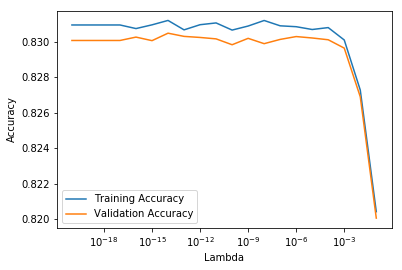

In [397]:
plt.plot(pri0_tr_acc[:,0], pri0_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri0_te_acc[:,0], pri0_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [398]:
pri0_te_acc

array([[1.00000000e-20, 8.30067060e-01],
       [1.00000000e-19, 8.30067060e-01],
       [1.00000000e-18, 8.30067060e-01],
       [1.00000000e-17, 8.30067060e-01],
       [1.00000000e-16, 8.30257232e-01],
       [1.00000000e-15, 8.30057051e-01],
       [1.00000000e-14, 8.30477430e-01],
       [1.00000000e-13, 8.30297268e-01],
       [1.00000000e-12, 8.30237213e-01],
       [1.00000000e-11, 8.30157141e-01],
       [1.00000000e-10, 8.29826844e-01],
       [1.00000000e-09, 8.30187168e-01],
       [1.00000000e-08, 8.29886898e-01],
       [1.00000000e-07, 8.30127114e-01],
       [1.00000000e-06, 8.30287259e-01],
       [1.00000000e-05, 8.30207186e-01],
       [1.00000000e-04, 8.30107096e-01],
       [1.00000000e-03, 8.29636673e-01],
       [1.00000000e-02, 8.26894205e-01],
       [1.00000000e-01, 8.20058052e-01]])

### Training for PRI_1 subset

Optimum degree = 12, 1e-3

In [399]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, build_poly(X_pri_1, 12), 5, h_pars=pars, model='ridge')

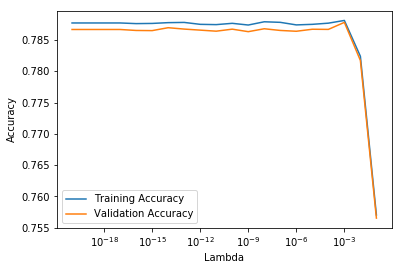

In [400]:
plt.plot(pri1_tr_acc[:,0], pri1_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri1_te_acc[:,0], pri1_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [401]:
pri1_te_acc

array([[1.00000000e-20, 7.86677844e-01],
       [1.00000000e-19, 7.86677844e-01],
       [1.00000000e-18, 7.86677844e-01],
       [1.00000000e-17, 7.86677844e-01],
       [1.00000000e-16, 7.86523085e-01],
       [1.00000000e-15, 7.86497292e-01],
       [1.00000000e-14, 7.86961568e-01],
       [1.00000000e-13, 7.86742327e-01],
       [1.00000000e-12, 7.86574671e-01],
       [1.00000000e-11, 7.86407016e-01],
       [1.00000000e-10, 7.86729430e-01],
       [1.00000000e-09, 7.86329636e-01],
       [1.00000000e-08, 7.86793913e-01],
       [1.00000000e-07, 7.86523085e-01],
       [1.00000000e-06, 7.86394119e-01],
       [1.00000000e-05, 7.86716533e-01],
       [1.00000000e-04, 7.86690740e-01],
       [1.00000000e-03, 7.87812742e-01],
       [1.00000000e-02, 7.81725561e-01],
       [1.00000000e-01, 7.56538561e-01]])

### Training for PRI_23 subset

Optimum degree = 11, 1e-5

In [402]:
pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, build_poly(X_pri_23, 11), 5, h_pars=pars, model='ridge')

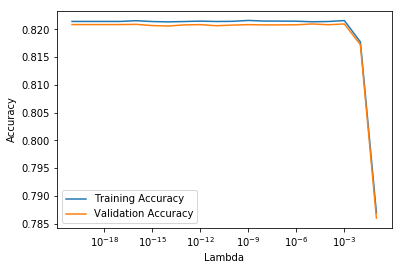

In [403]:
plt.plot(pri23_tr_acc[:,0], pri23_tr_acc[:,1], label='Training Accuracy')
plt.plot(pri23_te_acc[:,0], pri23_te_acc[:,1], label='Validation Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [404]:
pri23_te_acc

array([[1.00000000e-20, 8.20871243e-01],
       [1.00000000e-19, 8.20871243e-01],
       [1.00000000e-18, 8.20871243e-01],
       [1.00000000e-17, 8.20871243e-01],
       [1.00000000e-16, 8.20912600e-01],
       [1.00000000e-15, 8.20692032e-01],
       [1.00000000e-14, 8.20609319e-01],
       [1.00000000e-13, 8.20816101e-01],
       [1.00000000e-12, 8.20857458e-01],
       [1.00000000e-11, 8.20664461e-01],
       [1.00000000e-10, 8.20774745e-01],
       [1.00000000e-09, 8.20857458e-01],
       [1.00000000e-08, 8.20816101e-01],
       [1.00000000e-07, 8.20816101e-01],
       [1.00000000e-06, 8.20829887e-01],
       [1.00000000e-05, 8.20981527e-01],
       [1.00000000e-04, 8.20843672e-01],
       [1.00000000e-03, 8.20981527e-01],
       [1.00000000e-02, 8.17245658e-01],
       [1.00000000e-01, 7.86007720e-01]])

# Models

In [406]:
w0, loss0 = ridge_regression(y_pri_0, build_poly(X_pri_0, 12), 1e-14)
w1, loss1 = ridge_regression(y_pri_1, build_poly(X_pri_1, 12), 1e-3)
w23, loss23 = ridge_regression(y_pri_23, build_poly(X_pri_23, 11), 1e-5)
print(loss0)
print(loss1)
print(loss23)
np.save('w0', w0)
np.save('w1', w1)
np.save('w23', w23)

0.2453471109443536
0.31070397148498785
0.27521061691433657
